### Introduction

Finding happiness is a desire that all human beings share. We wonder what has the greatest influence on our happiness and what kind of people are the happiest. Continual research has been performed to determine which factors effect happiness the most. A quick look at the data (provided below) shows which countries report the highest levels of happiness and the subscores that influence these results. Though these results are interesting, most of these scores would be too difficult or impossible to simply change. Thus, this data urges us to ask a question: "What can we do to improve our own happiness score."

### Proposal

**Question**: How can happiness be improved on an individual level?<br>
**Potential Solution**: Smiiling and laughing on a regular basis will improve an individuals own happiness score.<br>
**Method of Testing**: Take 50 random individuals from 20 random countries (below) and require them to wear a wristband. Each time they look at the wristband they are to use some method (a memory, funny video, talking to a loved one, etc.) that will cause them to either laugh or smile. Test each invidiual's happiness level at the end of every week for six weeks, removing the wristband at week four (use the same ranking system and tests used for the world happiness report). Individuals will have their happiness level ranked on day one to determine a base level. T-tests will be performed comparing the difference made in happiness scores of all groups to each other every week (only tests with appropriate P-value being accepted).

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import seaborn as sns

In [2]:
#Read CSV
df = pd.read_csv("2017.csv")

In [3]:
df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
df.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [13]:
df

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


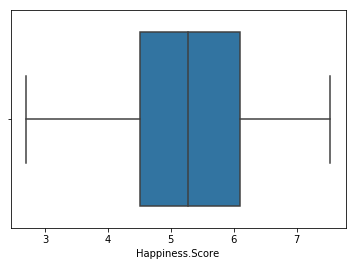

In [5]:
df1 = df[df['Happiness.Rank']<11]
sns.boxplot(df['Happiness.Score'])

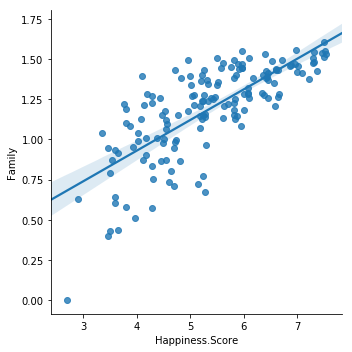

In [6]:
sns.lmplot('Happiness.Score','Family',data=df)

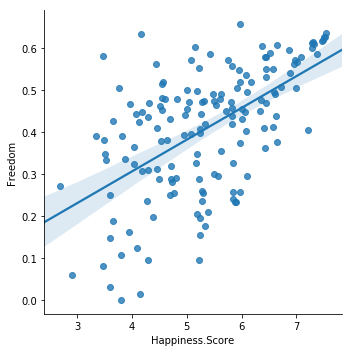

In [7]:
sns.lmplot('Happiness.Score','Freedom',data=df)

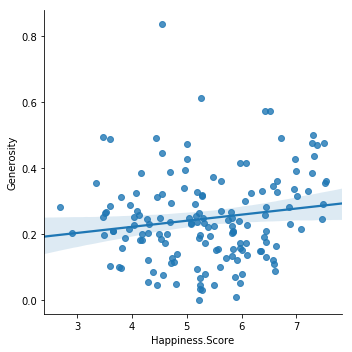

In [9]:
sns.lmplot('Happiness.Score','Generosity',data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

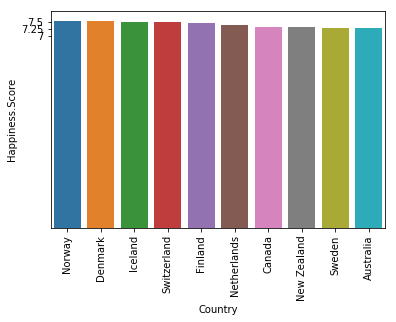

In [31]:
df_top=df[df['Happiness.Rank']<11]
sns.barplot(df_top['Country'],df_top['Happiness.Score'])
tick_val = [7, 7.25, 7.5]
tick_lab = ['7', '7.25', '7.5'] 
plt.yticks(tick_val, tick_lab)
plt.xticks(rotation=90)